<a href="https://colab.research.google.com/github/MS-H2020/Open/blob/main/test_sktime.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# [Python ライブラリー「sktime」で学ぶらくらくビジネス時系列機械学習 Web講座   – 第8回：時系列分類 –](https://www.salesanalytics.co.jp/software/sktime/sktime008/)

In [32]:
!pip install sktime

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [34]:
from sktime.datasets import load_italy_power_demand
X, y = load_italy_power_demand()

In [35]:
X

,dim_0
0,0 -0.710518 1 -1.183320 2 -1.372442 3...
1,0 -0.993009 1 -1.426786 2 -1.579884 3...
2,0 1.319067 1 0.569774 2 0.195128 3...
3,0 -0.812444 1 -1.157553 2 -1.416385 3...
4,0 -0.972840 1 -1.390518 2 -1.536705 3...
...,...
1091,0 0.431025 1 -0.518479 2 -1.118165 3...
1092,0 -0.612215 1 -1.049884 2 -1.362505 3...
1093,0 -1.262706 1 -1.449774 2 -1.519924 3...
1094,0 0.714321 1 0.629029 2 0.117277 3...


In [36]:
from sktime import datatypes
datatypes.mtype(X)

TypeError: Error in check_is_mtype, more than one mtype identified: ['nested_univ', 'pd_DataFrame_Table']

In [37]:
X.loc[5,:].values

array([0     0.367424
       1    -0.277808
       2    -0.761732
       3    -0.869271
       4    -1.138118
       5    -1.084348
       6    -1.138118
       7    -0.600424
       8    -1.084348
       9    -0.277808
       10    0.367424
       11    0.474963
       12    0.528732
       13    0.098577
       14   -0.277808
       15   -0.385347
       16   -0.600424
       17   -0.546655
       18   -0.492886
       19    0.367424
       20    2.303120
       21    2.088043
       22    1.765427
       23    1.173964
       dtype: float64], dtype=object)

In [38]:
y

array(['1', '1', '2', ..., '2', '2', '2'], dtype='<U1')

In [39]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.6)

In [40]:
X_train

,dim_0
251,0 -1.061455 1 -1.404717 2 -1.576348 3...
468,0 -0.525785 1 -1.082498 2 -1.342298 3...
136,0 -0.901833 1 -1.205821 2 -1.570608 3...
292,0 0.001894 1 -0.452713 2 -0.816399 3...
421,0 9.852253e-02 1 -1.970451e-01 2 -7....
...,...
946,0 -0.928349 1 -1.095871 2 -1.402994 3...
826,0 0.385873 1 -0.085023 2 -1.026814 3...
795,0 -1.028385 1 -1.106081 2 -1.598151 3...
935,0 -0.844097 1 -1.343742 2 -1.616275 3...


In [41]:
from sktime.classification.distance_based import KNeighborsTimeSeriesClassifier
classifier = KNeighborsTimeSeriesClassifier(distance="euclidean")
classifier

KNeighborsTimeSeriesClassifier(distance='euclidean')

In [42]:
classifier.fit(X_train, y_train)

KNeighborsTimeSeriesClassifier(distance='euclidean')

In [43]:
X_test, y_test, X_pred, y_pred = train_test_split(X_test,y_test,train_size=0.5)

In [44]:
y_train_pred = classifier.predict(X_train)
y_test_pred = classifier.predict(X_test)

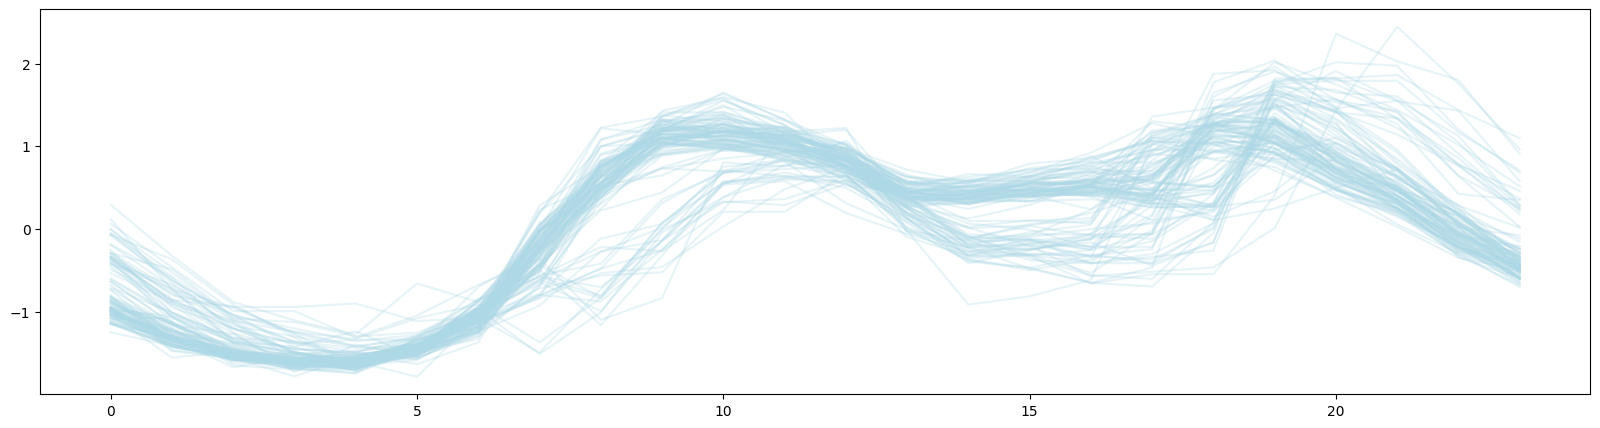

In [45]:
d = X_test.loc[y_test_pred=='1',:].copy()
plt.figure(figsize=(20,5))
for i in d.index:
    plt.plot(d.loc[i,:].values[0], c='lightblue', alpha=0.3)

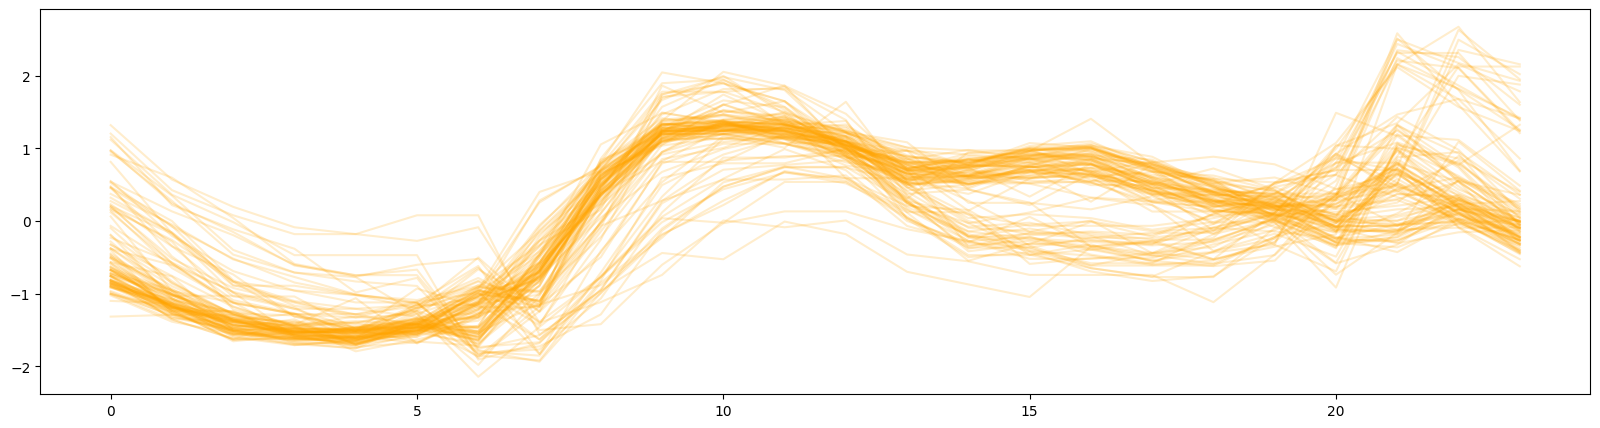

In [46]:
d = X_test.loc[y_test_pred=='2',:].copy()
plt.figure(figsize=(20,5))
for i in d.index:
    plt.plot(d.loc[i,:].values[0],c='orange',alpha=0.2)

In [47]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_test_pred)

ValueError: Found input variables with inconsistent numbers of samples: [220, 219]

In [48]:
from sklearn.metrics import f1_score
f1_score(y_true=(y_test=='1'),y_pred=(y_test_pred=='1'))

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [49]:
y_pred_new = classifier.predict(X_pred)
y_pred_new

TypeError: X must be in an sktime compatible format. Allowed scitypes for classifiers are Panel mtypes, for instance a pandas.DataFrame with MultiIndex and last(-1) level an sktime compatible time index. Allowed compatible mtype format specifications are: ['nested_univ', 'numpy3D', 'numpyflat', 'pd-multiindex', 'pd-wide', 'pd-long', 'df-list', 'dask_panel'] . See the data format tutorial examples/AA_datatypes_and_datasets.ipynb. If you think the data is already in an sktime supported input format, run sktime.datatypes.check_raise(data, mtype) to diagnose the error, where mtype is the string of the type specification you want. Error message for checked mtypes, in format [mtype: message], as follows: [df-list: obj must be list of pd.DataFrame, found <class 'numpy.ndarray'>]  [numpy3D: obj must be a 3D numpy.ndarray, but found 1D]  [pd-multiindex: obj must be a pd.DataFrame, found <class 'numpy.ndarray'>]  [nested_univ: obj must be a pd.DataFrame, found <class 'numpy.ndarray'>]  [dask_panel: obj must be a dask DataFrame, found <class 'numpy.ndarray'>] 